In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#Upload img

In [3]:
from google.colab import files
ufile=files.upload()

Saving car.jpg to car.jpg


In [4]:
print('type(ufile)：',type(ufile))
print('ufile：',ufile)

type(ufile)： <class 'dict'>
ufile： {'car.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x0b\x08\x08\n\x08\x07\x0b\n\t\n\r\x0c\x0b\r\x11\x1c\x12\x11\x0f\x0f\x11"\x19\x1a\x14\x1c)$+*($\'\'-2@7-0=0\'\'8L9=CEHIH+6OUNFT@GHE\x01\x0c\r\r\x11\x0f\x11!\x12\x12!E.\'.EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE\xff\xc2\x00\x11\x08\x00\xdc\x01^\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x07\x08\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xfa\xe0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02$\xb0\x00\x00\x00\x1a\xaaj`\xc6\xd3\x8bl\xad\xb3--$\x00\x00\x00\x1c\xff\x00\r\xcf\xd0i6zc&\xdav\xc9\xf2n\xfa\xb9\x80\x00\x00\x8b\xf3>Z\xf6\xf7\x92\xe7|\x99\xe4O=\xdd\xd6\xf4\xde\xd6\xdfXp\x1a\xbe\xb9\xbc\x00\x00P|\xb2_ym\x17\xe2\xbd\x14:\x0b\x8aR\xfb\xae\x89\xd6q\x18w<\xa7\t\xd9\xfdl\x00\x00\xe2~w\xd6\xf6\xd9k\xe2\xb8\x7f\x

In [5]:
for key in ufile:
  img_name=key 
  print(img_name)

car.jpg


#預處理圖片

查看照片

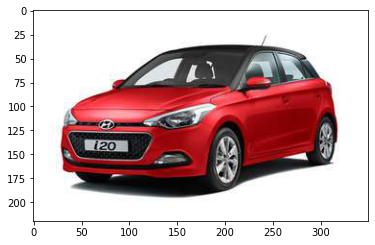

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open(img_name)
imgplot = plt.imshow(img)
plt.show()

轉換為32x32

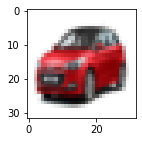

In [7]:
new_width  = 32
new_height = 32
img = img.resize((new_width, new_height),Image.BILINEAR )
plt.figure(figsize=(2,2))
imgplot = plt.imshow(img)

In [8]:
from tensorflow.keras.preprocessing import image

In [9]:
x_img = image.img_to_array(img)
x_img.shape 

(32, 32, 3)

In [10]:
import numpy as np 

In [11]:
x_img_4d = np.expand_dims(x_img,axis=0)
x_img_4d.shape 

(1, 32, 32, 3)

normalize

In [12]:
x_img_4d[0][0][0]

array([255., 255., 255.], dtype=float32)

In [13]:
x_img_4d_normalize = np.array(x_img_4d) / 255 

In [14]:
x_img_4d_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

連接 gdrive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#複製雲端硬碟模型目錄至虛擬主機

In [16]:
!mkdir -p Model/CifarCNN/

In [17]:
ls -l Model 

total 4
drwxr-xr-x 2 root root 4096 May 30 05:11 CifarCNN/


In [18]:
!cp -r  drive/MyDrive/Model/CifarCNN/  Model/

In [19]:
ls -l Model/CifarCNN/

total 8596
drwx------ 4 root root    4096 May 30 05:11 SavedModel/
-rw------- 1 root root    3415 May 30 05:11 structure.json
-rw------- 1 root root 2202904 May 30 05:11 weight.h5
-rw------- 1 root root 6588096 May 30 05:11 whole.h5


#載入模型

In [20]:
from tensorflow.keras.models import load_model

In [21]:
path="Model/CifarCNN/"
file_name="whole.h5"
loaded_model = load_model(path+file_name)
print("Loaded whole model from：",path+file_name)

Loaded whole model from： Model/CifarCNN/whole.h5


In [22]:
loaded_model.summary()

Model: "CifarCNNFunc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)             

#輸入預處理後的影像進行預測

In [23]:
probability=loaded_model.predict(x_img_4d_normalize) 

In [24]:
probability

array([[4.4289088e-08, 9.9963772e-01, 2.3330955e-09, 2.7550989e-10,
        5.4129795e-10, 3.6759018e-10, 2.0297376e-08, 9.9618758e-11,
        1.2730369e-08, 3.6215404e-04]], dtype=float32)

In [25]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [26]:
prediction

array([1])

In [27]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

#顯示預測結果

In [28]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

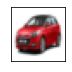

predict: automobile
airplane   Probability:0.000000044
automobile Probability:0.999637723
bird       Probability:0.000000002
cat        Probability:0.000000000
deer       Probability:0.000000001
dog        Probability:0.000000000
frog       Probability:0.000000020
horse      Probability:0.000000000
ship       Probability:0.000000013
truck      Probability:0.000362154


In [29]:
show_predicted_probability(x_img_4d_normalize,[],prediction,probability,0)